A fgray scale image can be viewed as a topographic surface where high intensity denotes peaks and the hills while low intensity denotes valleys. We start filling every isolated vallyes with different colored water(labels). as the water rises, depending on the peaks nearly, water from different valleys with different colors will start to merge. to avoid that, we build barriers in the locaitons where water meges. 

we continue the wokr of filling and building until the peaks are undewater. the barriers then give the segmentation result. 

but this approach gives an oversegented reuslt due to noise or any other irregularities in the image. so, OpenCv implements a maeker based wtaershed algorithm where you specify which are all valley points are to be merged and whic are not . It is an interactive image segmentation. we give different labels for the objects we know. label the gregion which we are sure of being the foreground or object with one color, label the region which we are sure of being backgorund or non-obkect with another color and finally the region which are are not sure ofa nuything. 

then, we apply the watershed algorithm. the markers wil be updated with the labels we gave, and the boundaries of objects will have

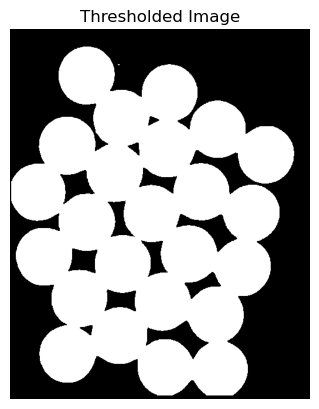

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('coins.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, threshold = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.imshow(threshold, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()

In [7]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(threshold,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

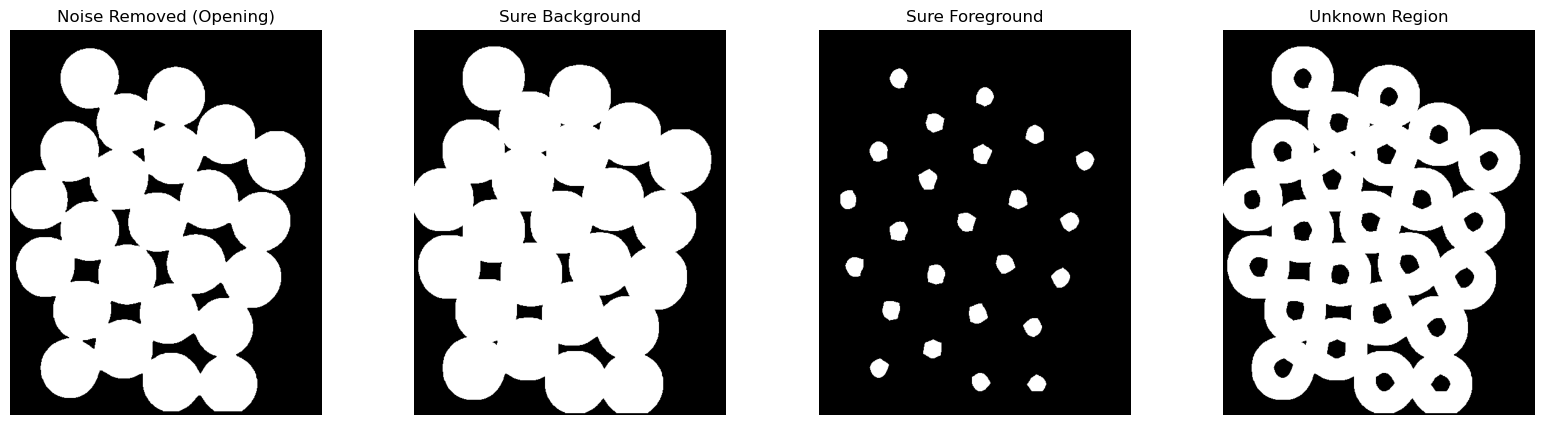

In [8]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].imshow(opening, cmap='gray')
axes[0].set_title('Noise Removed (Opening)')
axes[0].axis('off')

axes[1].imshow(sure_bg, cmap='gray')
axes[1].set_title('Sure Background')
axes[1].axis('off')

axes[2].imshow(sure_fg, cmap='gray')
axes[2].set_title('Sure Foreground')
axes[2].axis('off')

axes[3].imshow(unknown, cmap='gray')
axes[3].set_title('Unknown Region')
axes[3].axis('off')

plt.show()
